In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [2]:
df = pd.read_csv('athlete_events.csv', index_col='ID')

df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Columnas

1. Name - Athlete's name
2. Sex - M or F
3. Age - Integer
4. Height - In centimeters
5. Weight - In kilograms
6. Team - Team name
7. NOC - National Olympic Committee 3-letter code
8. Games - Year and season
9. Year - Integer
10. Season - Summer or Winter
11. City - Host city
12. Sport - Sport
13. Event - Event
14. Medal - Gold, Silver, Bronze, or NA

## Preguntas Clave

- ¿Cuál es la distribución de medallas por país a lo largo de los años?

Esta pregunta ayuda a identificar los países más exitosos en los Juegos Olímpicos.

- ¿Cómo ha evolucionado la participación de mujeres en los Juegos Olímpicos a lo largo de los años?

Un análisis del cambio en la participación femenina puede mostrar tendencias importantes en la igualdad de género en el deporte.

- ¿Cuál es la relación entre la altura y el peso de los atletas según su deporte?

Esto podría proporcionar información sobre las características físicas comunes de los atletas en diferentes disciplinas.

- ¿Cómo varía la edad de los medallistas entre diferentes deportes y eventos?

Esta pregunta ayuda a entender en qué deportes los atletas tienden a alcanzar el éxito a diferentes edades.

- ¿Cuáles son las ciudades que más veces han sido sede de los Juegos Olímpicos y cómo ha sido la distribución de medallas en esas ciudades?

Esto podría mostrar si ser sede de los Juegos ofrece alguna ventaja a los atletas locales.

- ¿Cuál es la relación entre la temporada (verano o invierno) y el tipo de deportes que más medallas generan?

Esto puede ayudar a segmentar los deportes según la estación y analizar el éxito relativo de cada uno.

- ¿Cómo ha cambiado la distribución de deportes en los Juegos Olímpicos a lo largo del tiempo?

Identificar tendencias en la inclusión de nuevos deportes o la eliminación de otros puede ser relevante para planificar futuros Juegos.

- ¿Existen diferencias significativas en la cantidad de medallas ganadas entre atletas masculinos y femeninos?

Un análisis de este tipo podría ayudar a destacar avances o disparidades en la competencia por género.

- ¿Cuáles son los países emergentes en los últimos Juegos Olímpicos en términos de medallas ganadas?

Identificar países con mejoras significativas podría ser útil para entender tendencias globales en el deporte.

- ¿Cuál es la tasa de éxito (medallas ganadas) de los atletas en función de la cantidad de Juegos Olímpicos en los que han participado?

Esto podría dar una idea de la experiencia y la longevidad en la carrera de los atletas exitosos.

In [3]:
df.shape

(271116, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [5]:
df.isnull().sum()

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
numeric_columns = df.select_dtypes(include=np.number)

for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
df.Medal = df.Medal.fillna('No Medal')

In [8]:
df.isnull().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [9]:
df.duplicated().sum()

1385

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe().round()

,Age,Height,Weight,Year
count,269731.0,269731.0,269731.0,269731.0
mean,25.0,175.0,71.0,1979.0
std,6.0,9.0,13.0,30.0
min,10.0,127.0,25.0,1896.0
25%,22.0,170.0,63.0,1960.0
50%,25.0,175.0,71.0,1988.0
75%,28.0,180.0,76.0,2002.0
max,97.0,226.0,214.0,2016.0


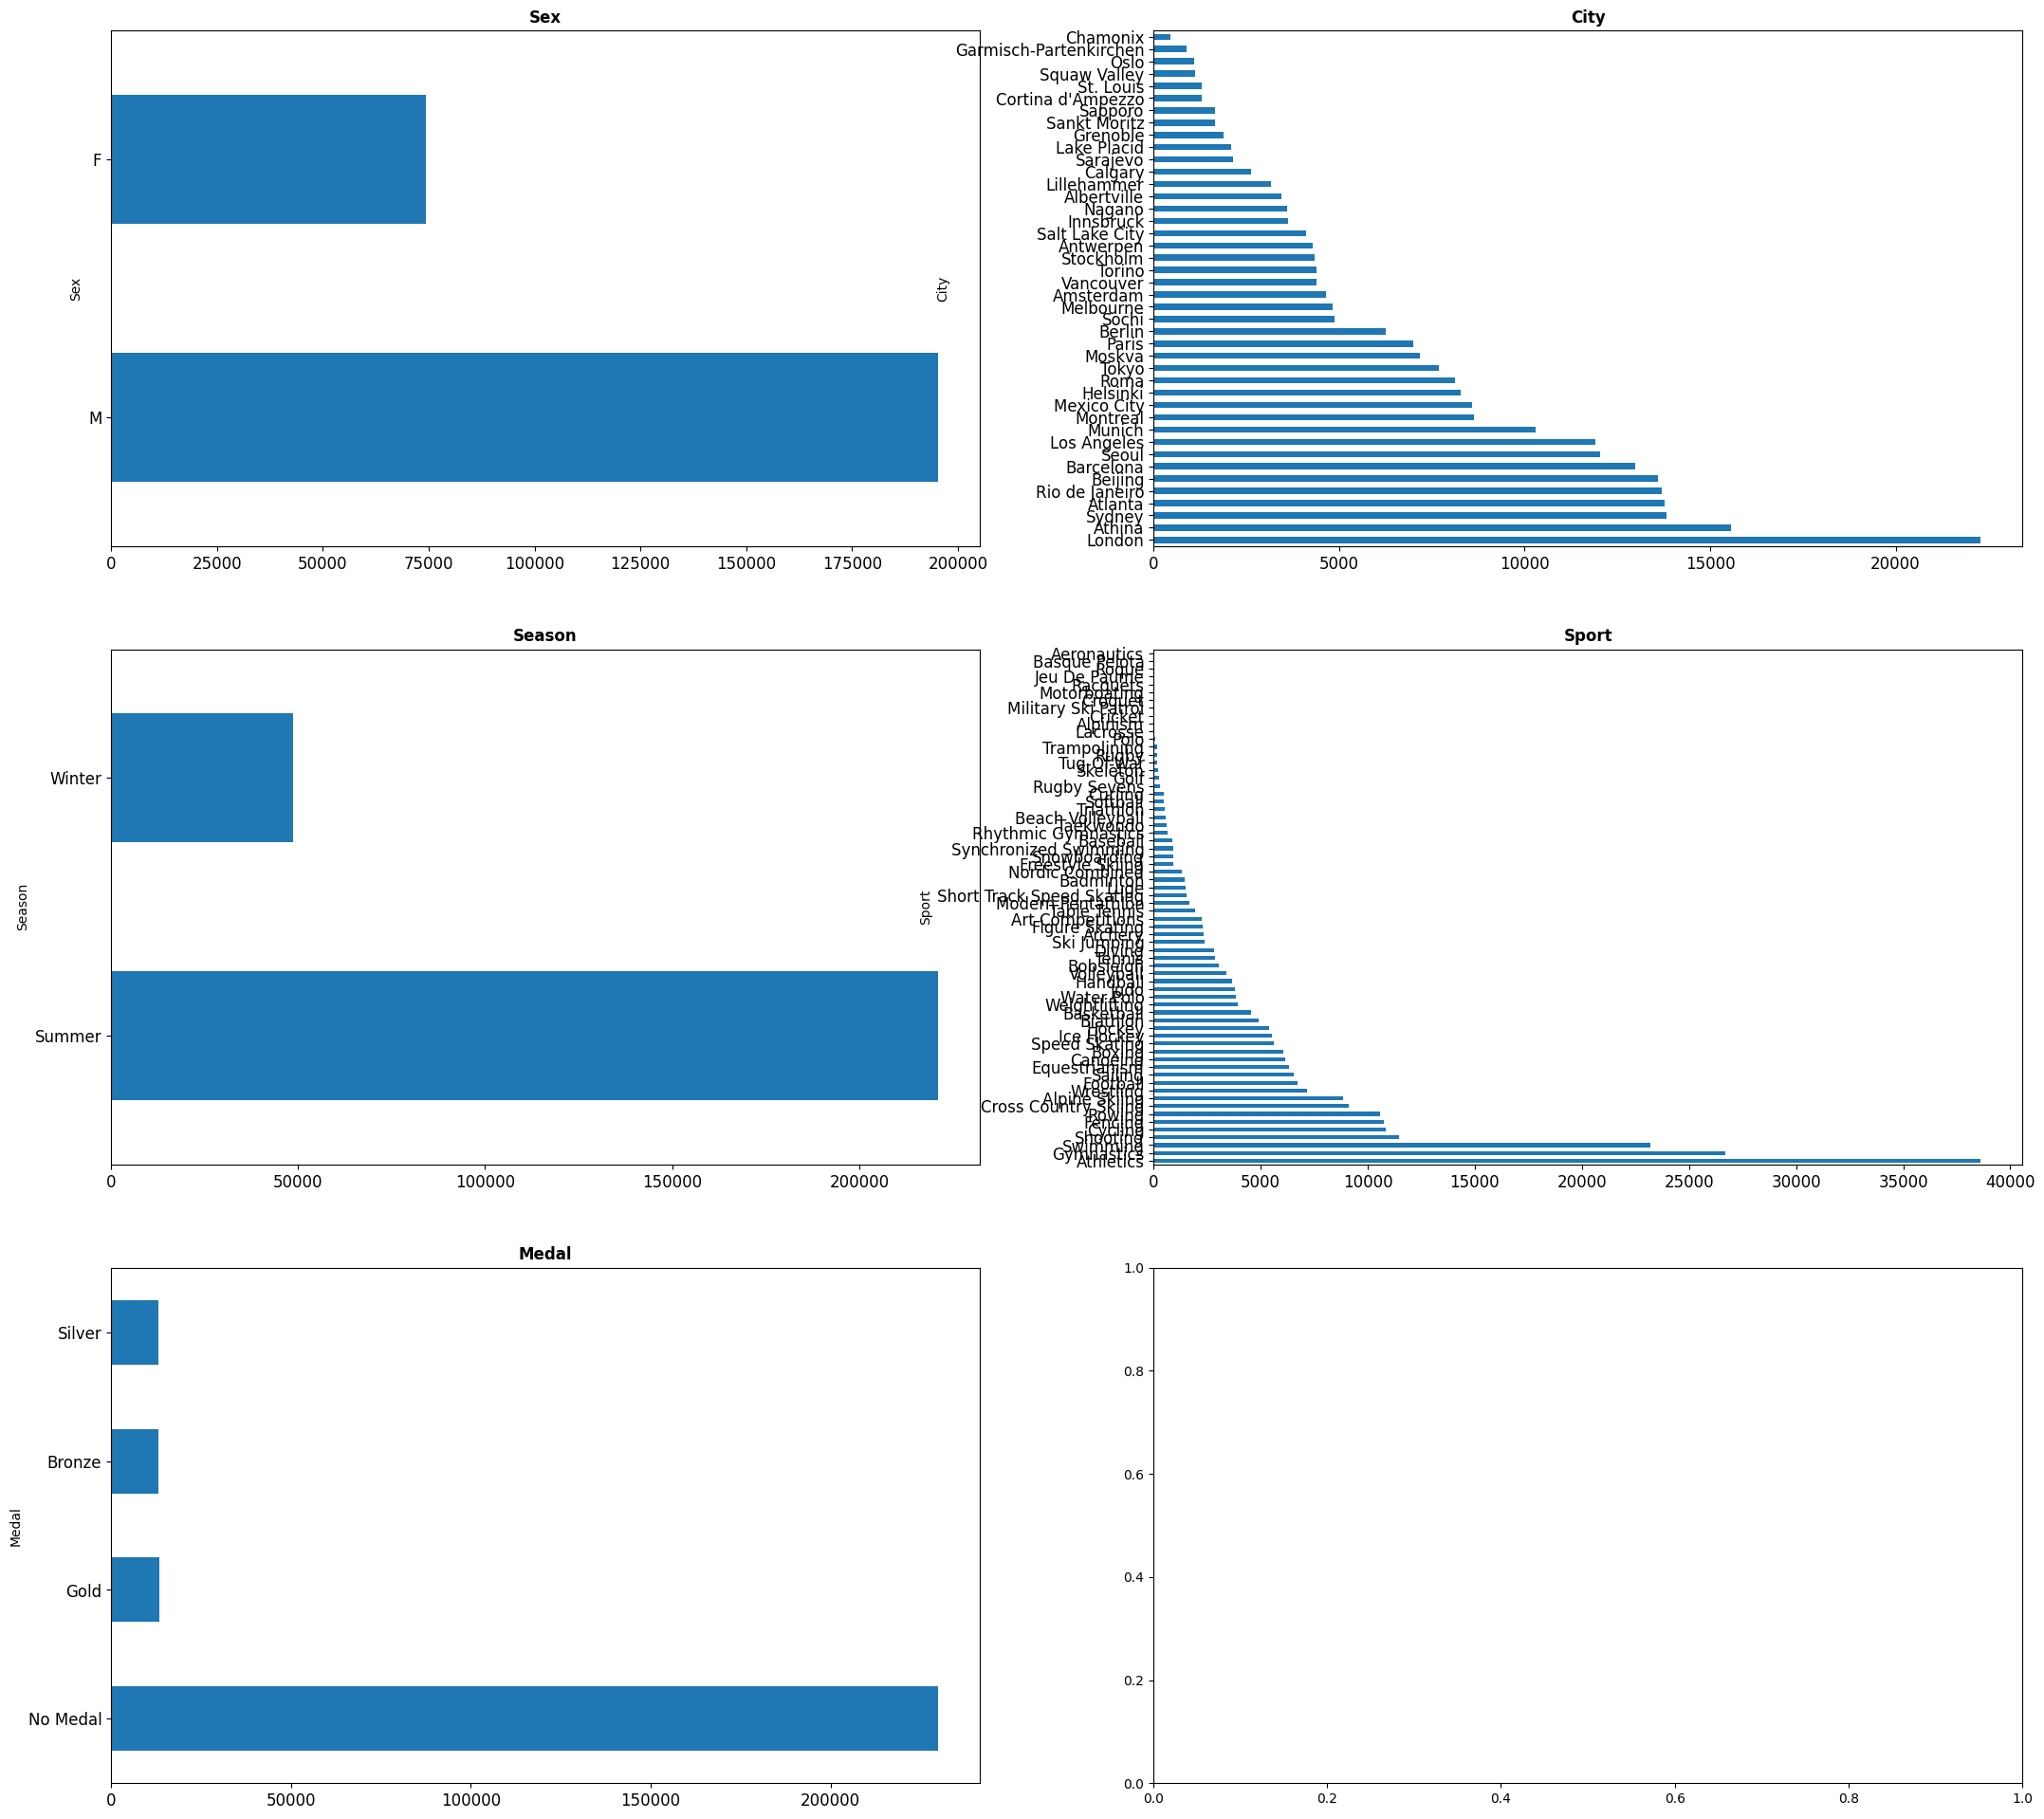

In [13]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (26, filas * 8))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
        
graficos_eda_categoricos(df.select_dtypes('O').loc[:,['Sex','City', 'Season', 'Sport', 'Medal']])

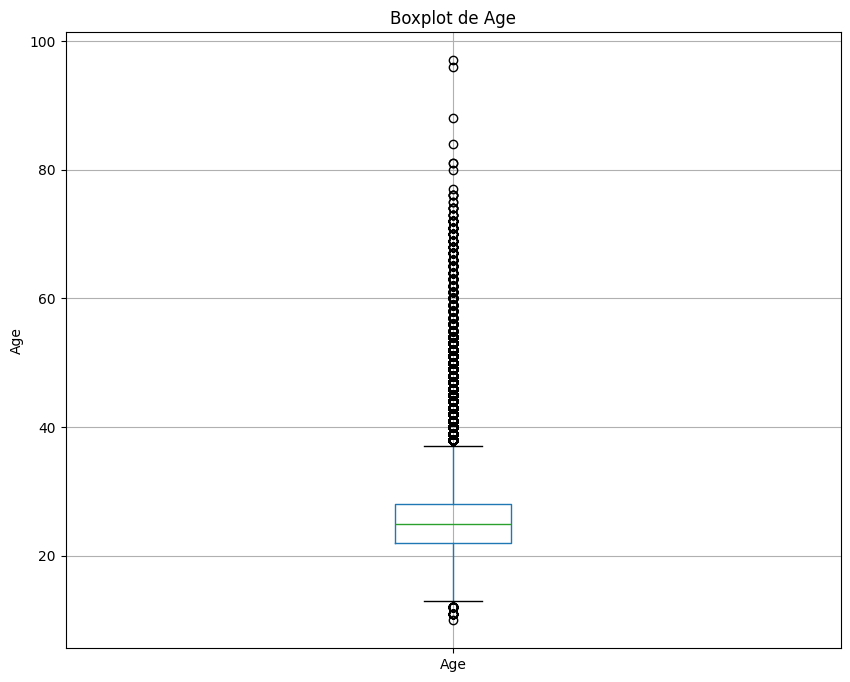

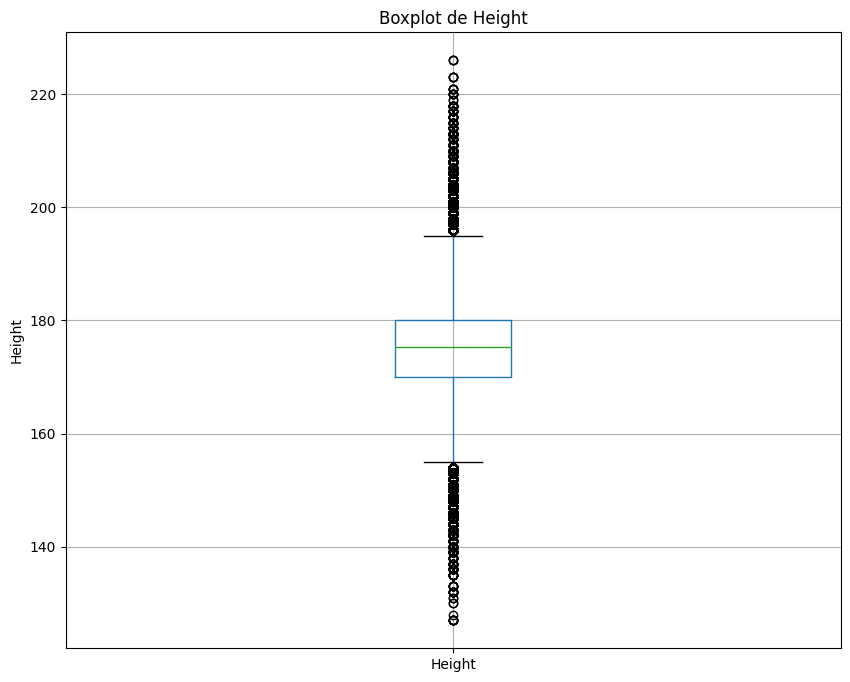

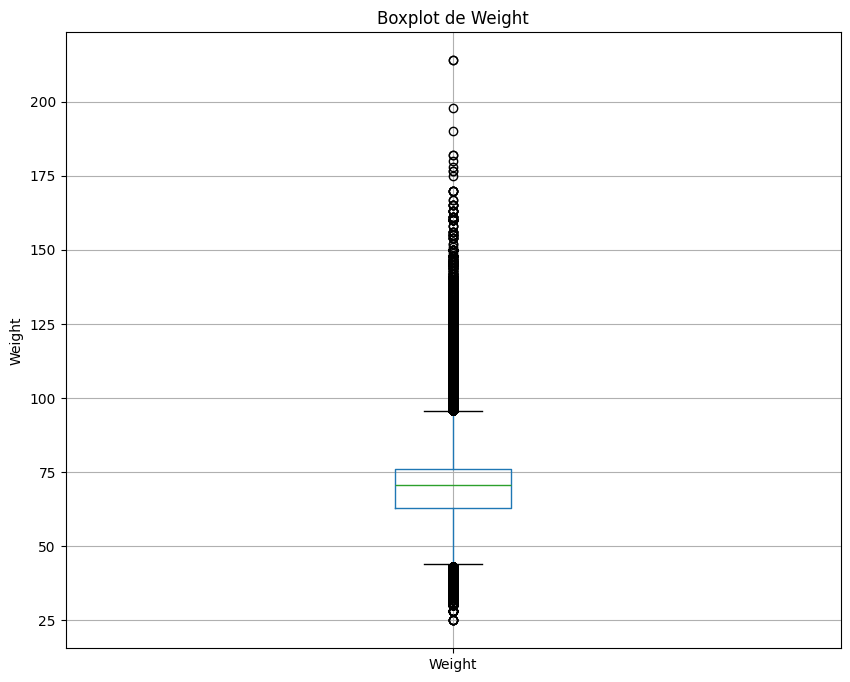

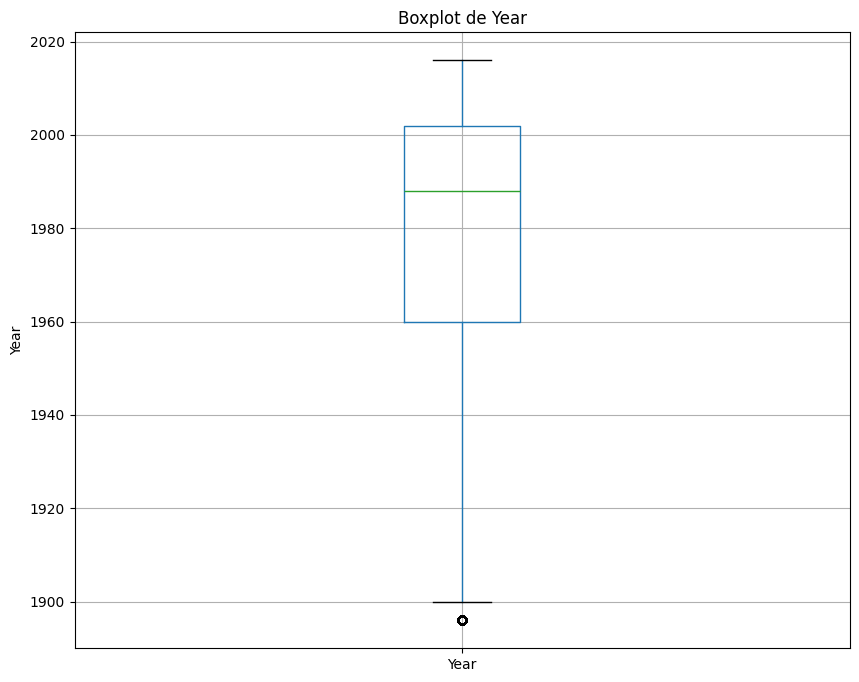

In [14]:
def graficos_boxplot(df):
	  
	  # Selecciona solo las columnas numéricas
    df_numerico = df.select_dtypes('number')
    
    # Itera sobre cada columna numérica
    for columna in df_numerico.columns:
        plt.figure(figsize=(10, 8))
        df.boxplot(column=columna)
        plt.title(f'Boxplot de {columna}')
        plt.ylabel(columna)
        plt.show()
        

graficos_boxplot(df)

## Analisis de la edad


In [15]:
rango_iqr = stats.iqr(df['Age'])

print(f"El rango intercuartilico es: {rango_iqr}")
print(f'El rango inferior es {np.quantile(df["Age"], 0.25) - rango_iqr * 1.5}')
print(f'El rango superior es {np.quantile(df["Age"], 0.75) + rango_iqr * 1.5}')

El rango intercuartilico es: 6.0
El rango inferior es 13.0
El rango superior es 37.0


In [16]:
df[df.Age < 13].Age.value_counts()

Age
12.0    39
11.0    13
10.0     1
Name: count, dtype: int64

## Análisis de estatura

In [17]:
rango_iqr = stats.iqr(df['Height'])

print(f"El rango intercuartilico es: {rango_iqr}")
print(f'El rango inferior es {np.quantile(df["Height"], 0.25) - rango_iqr * 1.5}')
print(f'El rango superior es {np.quantile(df["Height"], 0.75) + rango_iqr * 1.5}')

El rango intercuartilico es: 10.0
El rango inferior es 155.0
El rango superior es 195.0


In [18]:
df[df.Height < 155].Height.value_counts()

Height
152.0    839
154.0    697
150.0    685
153.0    679
151.0    236
147.0    210
148.0    206
149.0    187
145.0    164
146.0    155
142.0    121
144.0     99
143.0     77
140.0     60
139.0     48
136.0     28
141.0     25
138.0     20
137.0     18
135.0     14
132.0      9
127.0      7
133.0      6
131.0      2
130.0      2
128.0      1
Name: count, dtype: int64

In [19]:
df[df.Height == 128]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
90772,Helman Palije,M,21.0,128.0,74.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Middleweight,No Medal


In [20]:
rango_iqr = stats.iqr(df['Weight'])

print(f"El rango intercuartilico es: {rango_iqr}")
print(f'El rango inferior es {np.quantile(df["Weight"], 0.25) - rango_iqr * 1.5}')
print(f'El rango superior es {np.quantile(df["Weight"], 0.75) + rango_iqr * 1.5}')

El rango intercuartilico es: 13.0
El rango inferior es 43.5
El rango superior es 95.5


In [21]:
df[df.Weight > 93].Weight.value_counts().sort_index(ascending=False)

Weight
214.0       2
198.0       1
190.0       1
182.0       2
180.0       1
         ... 
96.0      859
95.5        2
95.0     1842
94.0      990
93.5        4
Name: count, Length: 108, dtype: int64

In [22]:
df[df.Weight > 93].count()

Name      12593
Sex       12593
Age       12593
Height    12593
Weight    12593
Team      12593
NOC       12593
Games     12593
Year      12593
Season    12593
City      12593
Sport     12593
Event     12593
Medal     12593
dtype: int64

## ¿Cuál es la distribución de medallas por país?

In [23]:
country_medal = df.groupby(['Team', 'Medal']).size().unstack().fillna(0)
country_medal['total'] = country_medal.sum(axis=1)
country_medal_top20 = country_medal.sort_values(by='total',ascending=False).drop('No Medal', axis=1).head(10)
country_medal_top20


Medal,Bronze,Gold,Silver,total
Team,,,,
United States,1233.0,2474.0,1512.0,17598.0
France,577.0,455.0,518.0,11817.0
Great Britain,572.0,519.0,582.0,11264.0
Italy,484.0,535.0,508.0,10213.0
Germany,678.0,679.0,627.0,9230.0
Canada,408.0,422.0,413.0,9226.0
Japan,357.0,247.0,307.0,8269.0
Sweden,507.0,451.0,476.0,8004.0
Australia,511.0,342.0,453.0,7512.0


             Team   Medal   Count
0   United States    Gold  2474.0
1          France    Gold   455.0
2   Great Britain    Gold   519.0
3           Italy    Gold   535.0
4         Germany    Gold   679.0
5          Canada    Gold   422.0
6           Japan    Gold   247.0
7          Sweden    Gold   451.0
8       Australia    Gold   342.0
9         Hungary    Gold   432.0
10  United States  Silver  1512.0
11         France  Silver   518.0
12  Great Britain  Silver   582.0
13          Italy  Silver   508.0
14        Germany  Silver   627.0
15         Canada  Silver   413.0
16          Japan  Silver   307.0
17         Sweden  Silver   476.0
18      Australia  Silver   453.0
19        Hungary  Silver   330.0
20  United States  Bronze  1233.0
21         France  Bronze   577.0
22  Great Britain  Bronze   572.0
23          Italy  Bronze   484.0
24        Germany  Bronze   678.0
25         Canada  Bronze   408.0
26          Japan  Bronze   357.0
27         Sweden  Bronze   507.0
28      Austra

<Axes: xlabel='Team', ylabel='Count'>

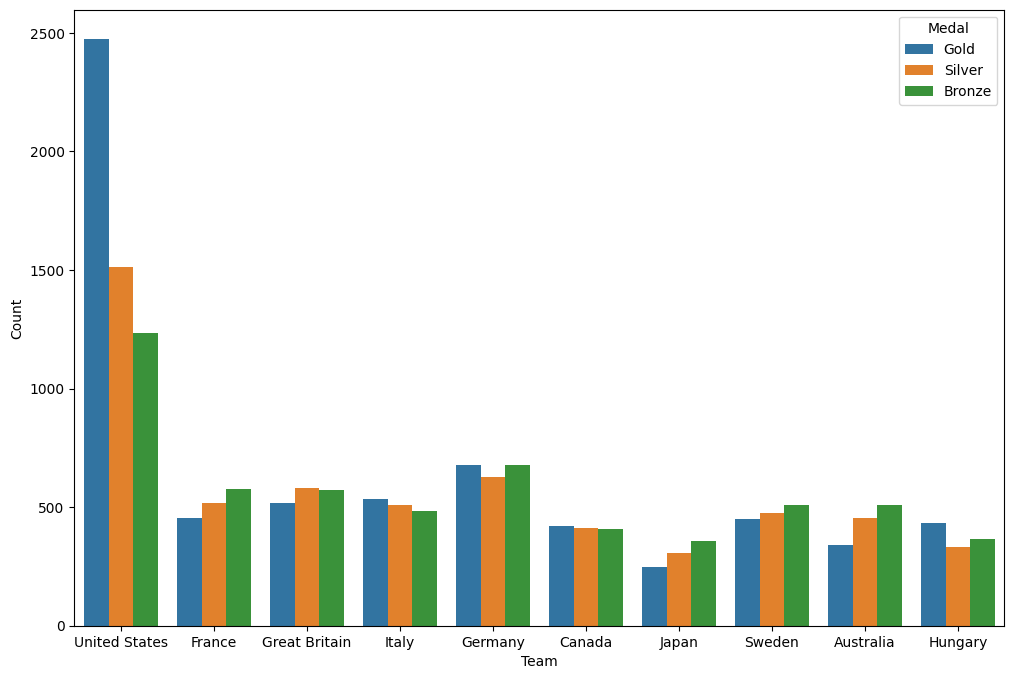

In [24]:
country_medal_reset = country_medal_top20.reset_index()
medals_melted = country_medal_reset.melt(id_vars='Team', value_vars=['Gold', 'Silver', 'Bronze'], var_name='Medal', value_name='Count')

print(medals_melted)

# Ahora creamos el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
sns.barplot(x='Team', y='Count', hue='Medal', data=medals_melted)

## ¿Cómo ha evolucionado la participación de mujeres en los Juegos Olímpicos a lo largo de los años?

Creamos los dataframes para hombres y mujeres y hacer la segmentación de datos, al igual que la segemntación de los juegos olímpicos de invierno y verano

<Axes: xlabel='Year', ylabel='Count'>

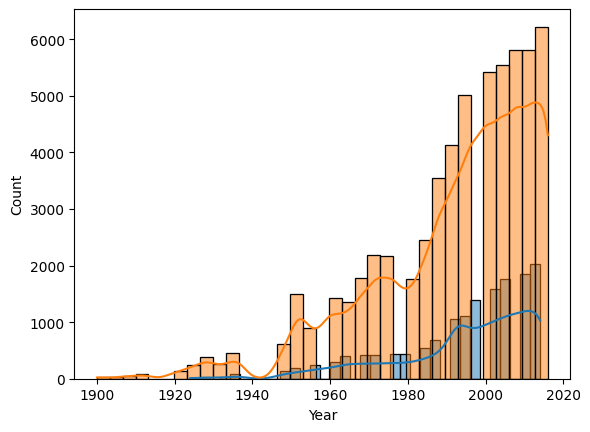

In [25]:
females = df[df.Sex == 'F']
males = df[df.Sex == 'M']

females_winter = females[females.Season == 'Winter']
males_winter = males[males.Season == 'Winter']

females_summer = females[females.Season == 'Summer']
males_summer = males[males.Season == 'Summer']

female_participation_winter = females_winter.groupby('Year').size().reset_index().rename(columns={0: 'count'})
female_participation_summer = females_summer.groupby('Year').size().reset_index().rename(columns={0: 'count'})

sns.histplot(data=females_winter, x='Year', bins=35, kde=True) 
sns.histplot(data=females_summer, x='Year', bins=35, kde=True) 


## ¿Cuál es la relación entre la altura y el peso de los atletas según su deporte?

Mostramos la realación entre altura y peso para los 3 deportes más comunes en las olimpiadas

### Mujeres

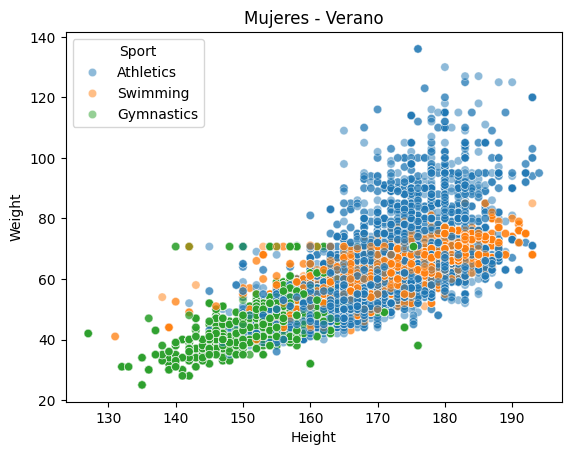

Text(0.5, 1.0, 'Mujeres - Invierno')

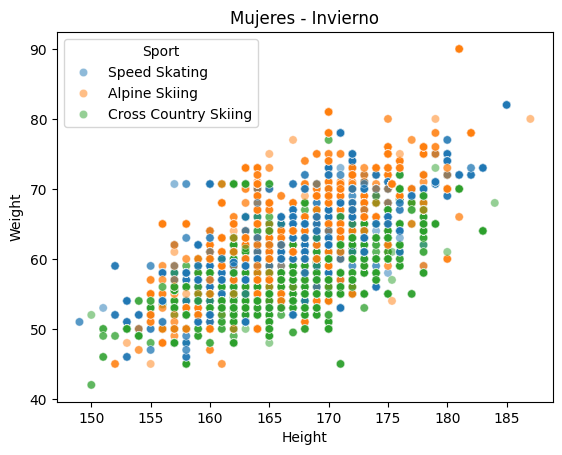

In [26]:
female_summer_sports = females_summer.Sport.value_counts().head(3).index.to_list()
female_winter_sports = females_winter.Sport.value_counts().head(3).index.to_list()

female_summer_top_3_sports_dataframe = females_summer[females_summer.Sport.isin(female_summer_sports)]
female_winter_top_3_sports_dataframe = females_winter[females_winter.Sport.isin(female_winter_sports)]

# Crear la visualización
sns.scatterplot(data=female_summer_top_3_sports_dataframe, x='Height', y='Weight', hue='Sport', alpha=0.5)
plt.title('Mujeres - Verano')
plt.show()
sns.scatterplot(data=female_winter_top_3_sports_dataframe, x='Height', y='Weight', hue='Sport', alpha=0.5)
plt.title('Mujeres - Invierno')


### Hombres

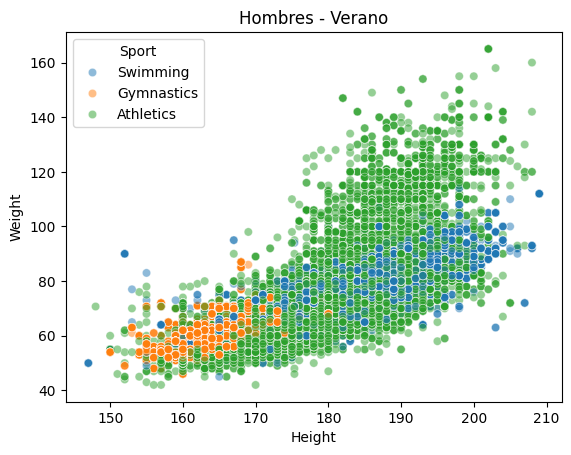

Text(0.5, 1.0, 'Hombres - Invierno')

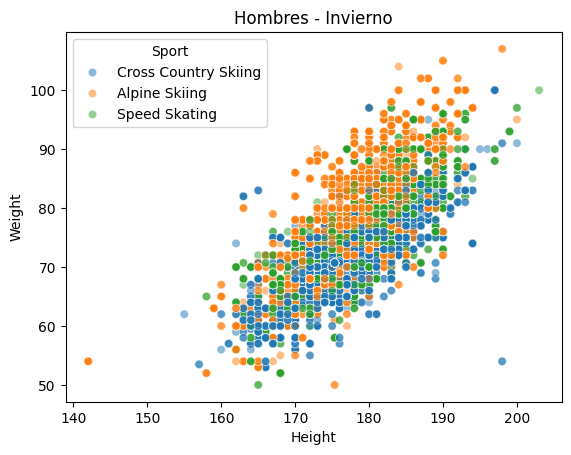

In [27]:

male_summer_sports = males_summer.Sport.value_counts().head(3).index.to_list()
male_winter_sports = males_winter.Sport.value_counts().head(3).index.to_list()

male_summer_top_3_sports_dataframe = males_summer[males_summer.Sport.isin(female_summer_sports)]
male_winter_top_3_sports_dataframe = males_winter[males_winter.Sport.isin(female_winter_sports)]

# Crear la visualización
sns.scatterplot(data=male_summer_top_3_sports_dataframe, x='Height', y='Weight', hue='Sport', alpha=0.5)
plt.title('Hombres - Verano')
plt.show()
sns.scatterplot(data=male_winter_top_3_sports_dataframe, x='Height', y='Weight', hue='Sport', alpha=0.5)
plt.title('Hombres - Invierno')

## Variación de la edad de los medallistas entre diferentes deportes y eventos, segmentado por sexo y temporada

Mostramos la relación de las personas que han obtenido medallas en los 10 deportes con más participantes

Sport
Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10827
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: count, dtype: int64


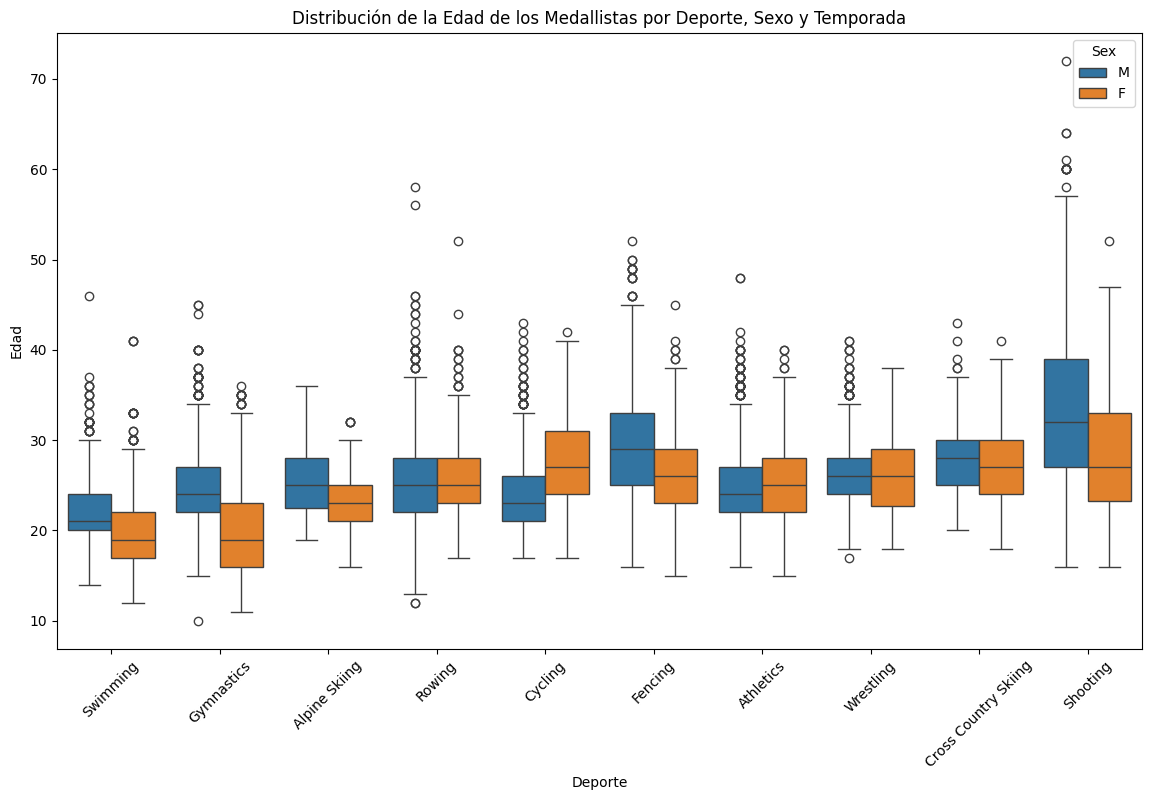

In [28]:
top_ten_sports = df.Sport.value_counts().sort_values(ascending=False).head(10).index.to_list()
print(df.Sport.value_counts().sort_values(ascending=False).head(10))

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[(df.Sport.isin(top_ten_sports)) & (df.Medal != 'No Medal')], x='Sport', y='Age', hue='Sex')
plt.title("Distribución de la Edad de los Medallistas por Deporte, Sexo y Temporada")
plt.xlabel("Deporte")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.show()


## Países emergentes en los últimos Juegos Olímpicos en términos de medallas ganadas, segmentado por temporada

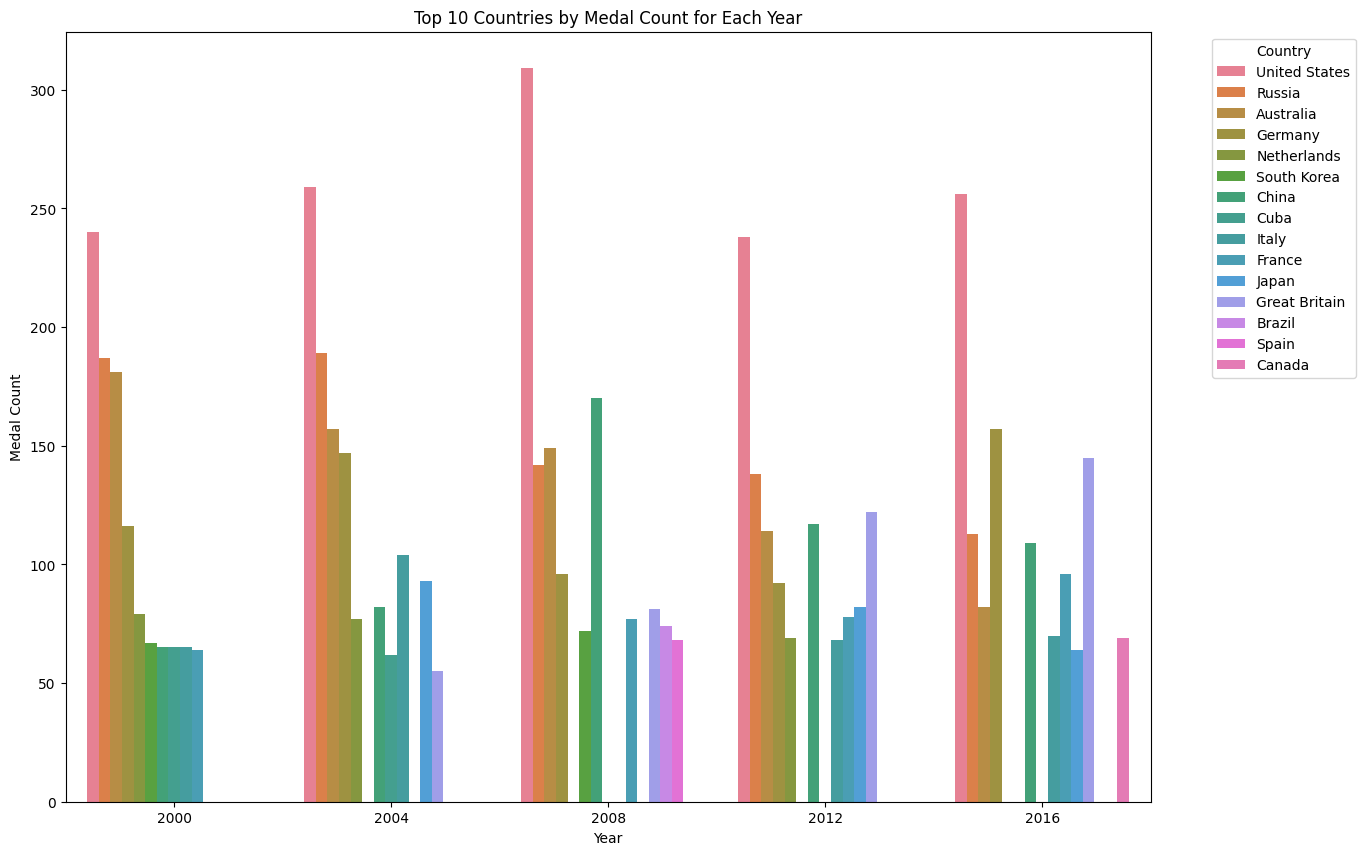

In [35]:
# Filtrar los datos de los últimos Juegos Olímpicos
recent_games_summer = df[(df['Year'] >= 2000) & (df['Medal'] != 'No Medal') & (df['Season'] == 'Summer')]

medals_by_country_recent_summer_season = recent_games_summer.groupby(['Year', 'Team']).size().reset_index(name='Medal Count')
medals_by_country_recent_summer_season = medals_by_country_recent_summer_season.sort_values(by=['Year', 'Medal Count'], ascending=[True, False])

top_10_countries_by_year_summer = medals_by_country_recent_summer_season.groupby('Year').head(10).reset_index(drop=True)

plt.figure(figsize=(14, 10))
sns.barplot(x='Year', y='Medal Count', hue='Team', data=top_10_countries_by_year_summer, dodge=True)
plt.title('Top 10 Countries by Medal Count for Each Year')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



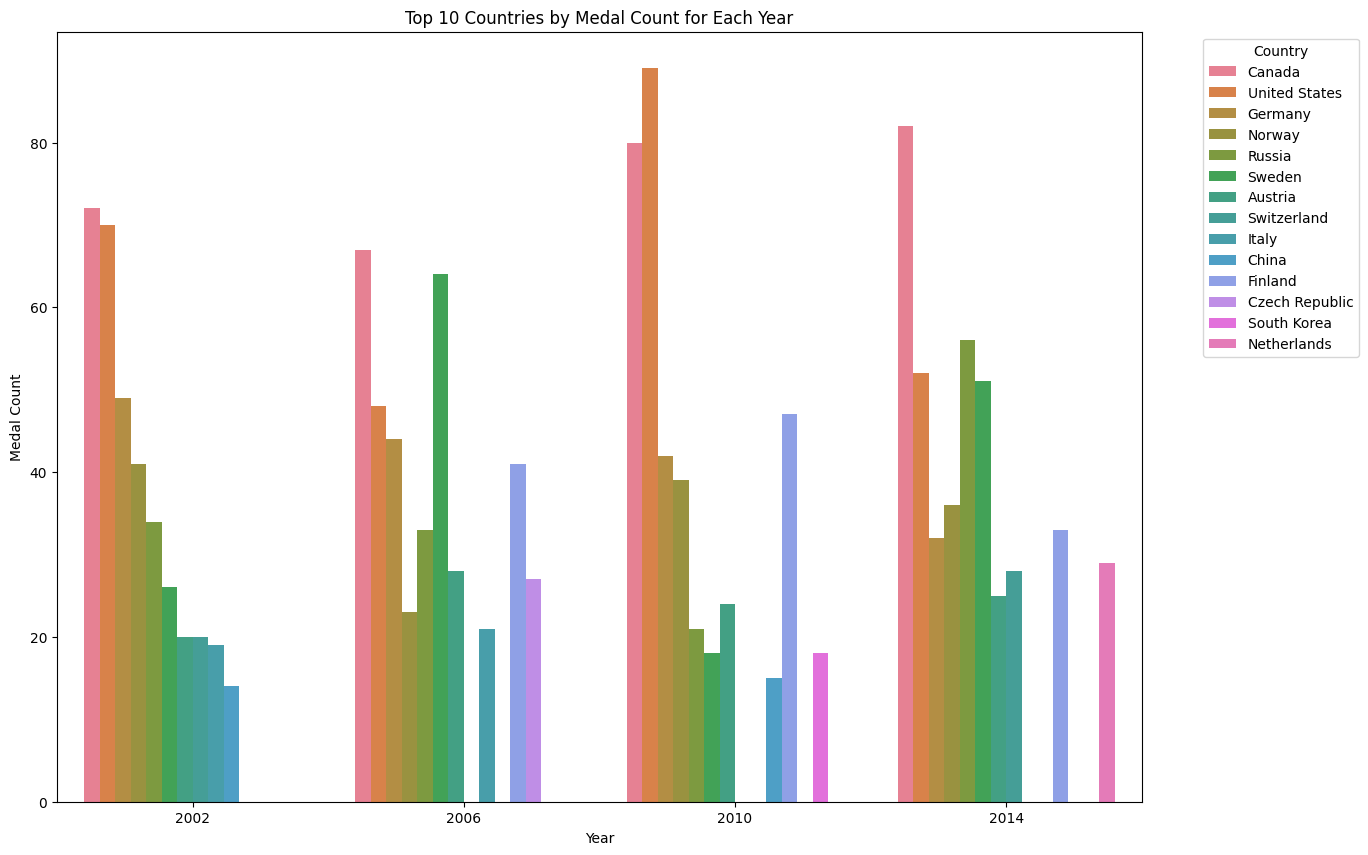

In [34]:
# Filtrar los datos de los últimos Juegos Olímpicos
recent_games_winter = df[(df['Year'] >= 2000) & (df['Medal'] != 'No Medal') & (df['Season'] == 'Winter')]

medals_by_country_recent_winter_season = recent_games_winter.groupby(['Year', 'Team']).size().reset_index(name='Medal Count')
medals_by_country_recent_winter_season = medals_by_country_recent_winter_season.sort_values(by=['Year', 'Medal Count'], ascending=[True, False])

top_10_countries_by_year_winter = medals_by_country_recent_winter_season.groupby('Year').head(10).reset_index(drop=True)

plt.figure(figsize=(14, 10))
sns.barplot(x='Year', y='Medal Count', hue='Team', data=top_10_countries_by_year_winter, dodge=True)
plt.title('Top 10 Countries by Medal Count for Each Year')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Tasa de éxito de los atletas en función de la cantidad de Juegos Olímpicos en los que han participado, segmentado por sexo

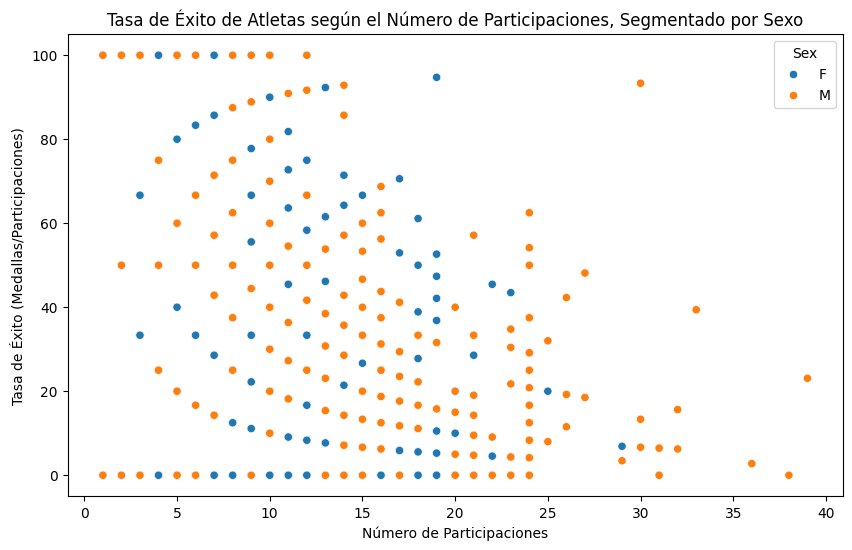

In [51]:
#filtrar datos de las medallas
df['Medal_count'] = df['Medal'].apply(lambda x: 1 if x in ['Gold', 'Silver', 'Bronze'] else 0)

participations_medals_sex = df.groupby(['Name', 'Sex']).agg({
    'Name': 'count',
    'Medal_count': 'sum'
}).rename(columns={'Name': 'Participations', 'Medal_count': 'Medals'}).reset_index()


participations_medals_sex['Success Rate'] = (participations_medals_sex['Medals'] / participations_medals_sex['Participations']) * 100


plt.figure(figsize=(10, 6))
sns.scatterplot(data=participations_medals_sex, x='Participations', y='Success Rate', hue='Sex')
plt.title("Tasa de Éxito de Atletas según el Número de Participaciones, Segmentado por Sexo")
plt.xlabel("Número de Participaciones")
plt.ylabel("Tasa de Éxito (Medallas/Participaciones)")
plt.show()

## Cambio en la distribución de deportes en los Juegos Olímpicos a lo largo del tiempo, segmentado por temporada

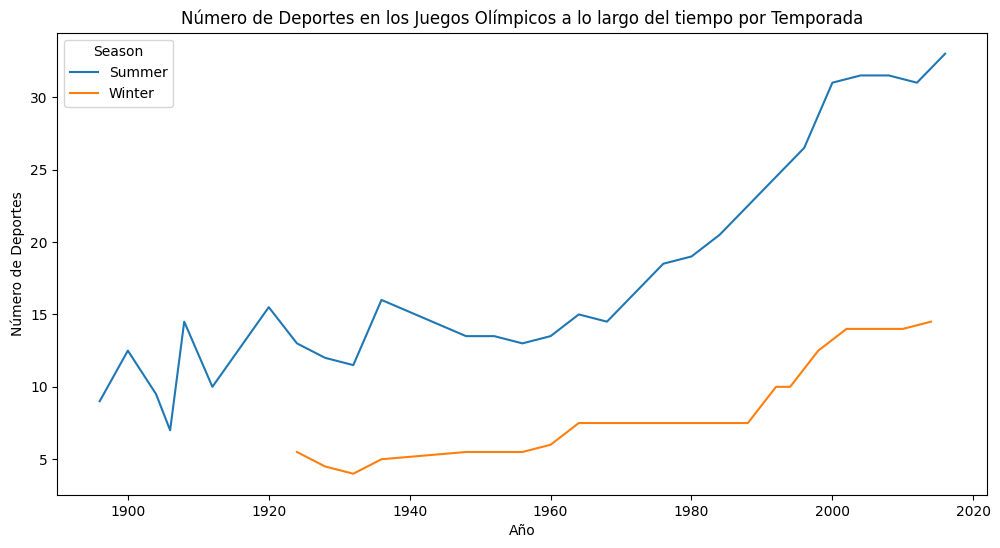

In [95]:
# Contar el número de deportes por año y temporada
sports_by_year_season = df.groupby(['Year', 'Sex', 'Season'])['Sport'].nunique().reset_index(name='Unique Sports')

plt.figure(figsize=(12, 6))
sns.lineplot(data=sports_by_year_season, x='Year', y='Unique Sports', errorbar=None, hue='Season')

plt.title("Número de Deportes en los Juegos Olímpicos a lo largo del tiempo por Temporada")
plt.xlabel("Año")
plt.ylabel("Número de Deportes")
plt.show()



## Diferencias significativas en la cantidad de medallas ganadas entre atletas masculinos y femeninos, segmentado por temporada

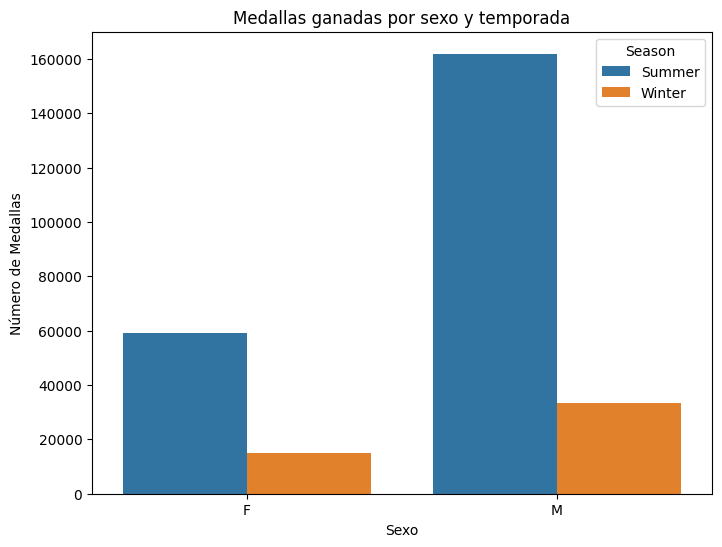

In [98]:
medals_by_sex_season = df.groupby(['Sex', 'Season']).size().reset_index(name='Medal Count')

# Crear la visualización
plt.figure(figsize=(8, 6))
sns.barplot(data=medals_by_sex_season, x='Sex', y='Medal Count', hue='Season')
plt.title("Medallas ganadas por sexo y temporada")
plt.xlabel("Sexo")
plt.ylabel("Número de Medallas")
plt.show()